## Biblioteca e import dos dados

In [10]:
import pandas as pd
import numpy as np

In [11]:
df1 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp2/datalake/silver/DFs tratados /full_grouped_filtro_começo_do_covid.csv')

In [12]:
#df1 = df1.replace("Argentina", "1")
#df1 = df1.replace("Chile", "2")
#df1 = df1.replace("Ecuador", "3")
#df1 = df1.replace("Mexico", "4")
#df1 = df1.replace("Spain", "5")
#df1 = df1.replace("Americas", "1")
#df1 = df1.replace("Europe", "2")
df1 = df1.rename({'Date': 'ds'}, axis = 1)
df1 = df1.rename({'New cases': 'y'}, axis = 1)
df1.head(30)

,Unnamed: 0,ds,Country/Region,Confirmed,Deaths,Recovered,Active,y,New deaths,New recovered,WHO Region
0,2027,2020-02-01,Spain,1,0,0,1,1,0,0,Europe
1,2214,2020-02-02,Spain,1,0,0,1,0,0,0,Europe
2,2401,2020-02-03,Spain,1,0,0,1,0,0,0,Europe
3,2588,2020-02-04,Spain,1,0,0,1,0,0,0,Europe
4,2775,2020-02-05,Spain,1,0,0,1,0,0,0,Europe
5,2962,2020-02-06,Spain,1,0,0,1,0,0,0,Europe
6,3149,2020-02-07,Spain,1,0,0,1,0,0,0,Europe
7,3336,2020-02-08,Spain,1,0,0,1,0,0,0,Europe
8,3523,2020-02-09,Spain,2,0,0,2,1,0,0,Europe
9,3710,2020-02-10,Spain,2,0,0,2,0,0,0,Europe


## Previsão da Argentina

In [13]:
pais=['Argentina']
df_ag = df1[df1['Country/Region'].isin(pais)]
df_ag= df_ag[['ds','y']]


df_ag.head()

,ds,y
49,2020-03-03,1
54,2020-03-04,0
59,2020-03-05,0
64,2020-03-06,1
69,2020-03-07,6


In [14]:
df_ag.tail()

,ds,y
759,2020-07-23,6127
764,2020-07-24,5493
769,2020-07-25,4814
774,2020-07-26,4192
779,2020-07-27,4890


In [15]:
# Python
import pandas as pd
from prophet import Prophet


In [16]:
m = Prophet()
m.fit(df_ag)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbulxj_6/lbek9fsk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbulxj_6/v2_au80f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78114', 'data', 'file=/tmp/tmphbulxj_6/lbek9fsk.json', 'init=/tmp/tmphbulxj_6/v2_au80f.json', 'output', 'file=/tmp/tmphbulxj_6/prophet_modellwia3oxw/prophet_model-20221207002050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
future = m.make_future_dataframe(periods=14)
display(future.head())
display(future.tail())


,ds
0,2020-03-03
1,2020-03-04
2,2020-03-05
3,2020-03-06
4,2020-03-07


,ds
156,2020-08-06
157,2020-08-07
158,2020-08-08
159,2020-08-09
160,2020-08-10


In [18]:
forecast = m.predict(future)
#forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

forecast.to_csv("prev_agentina.csv")


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

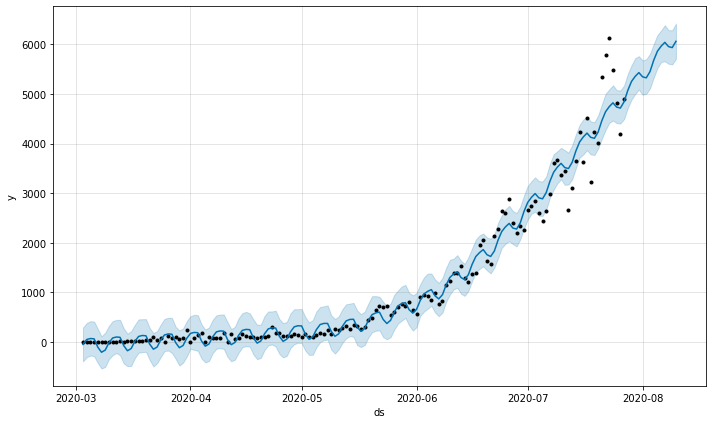

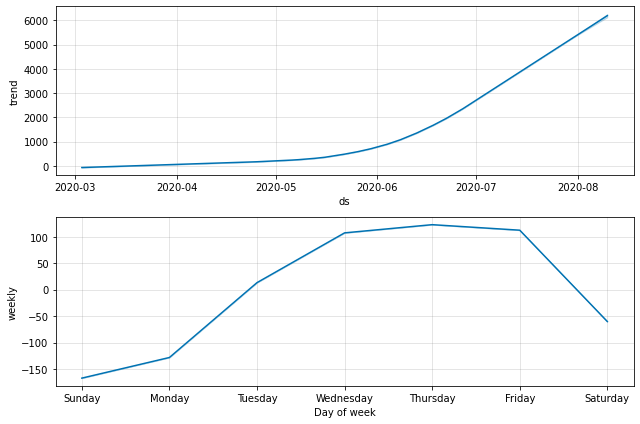

In [19]:
fig1 = m.plot(forecast1)
fig2 = m.plot_components(forecast1)
fig1.show
fig2.show

## Previsão da Spain


In [20]:
pais=['Spain']
df_sp = df1[df1['Country/Region'].isin(pais)]
df_sp= df_sp[['ds','y']]

m = Prophet()
m.fit(df_sp)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast.to_csv("prev_span.csv")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbulxj_6/nqwd1lev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbulxj_6/0fg4rucl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72223', 'data', 'file=/tmp/tmphbulxj_6/nqwd1lev.json', 'init=/tmp/tmphbulxj_6/0fg4rucl.json', 'output', 'file=/tmp/tmphbulxj_6/prophet_modeli2eav4ue/prophet_model-20221207002052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

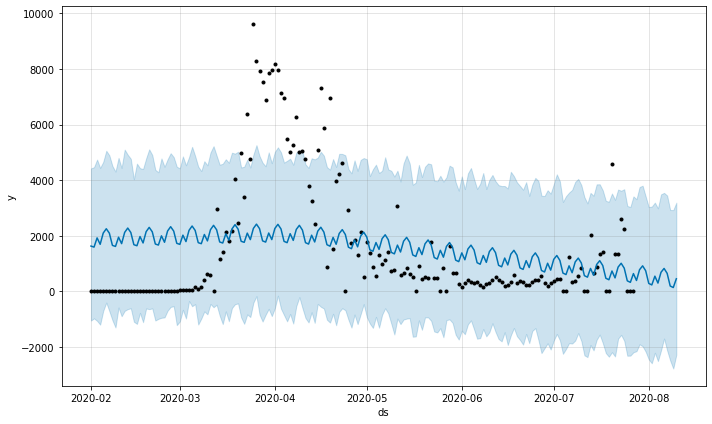

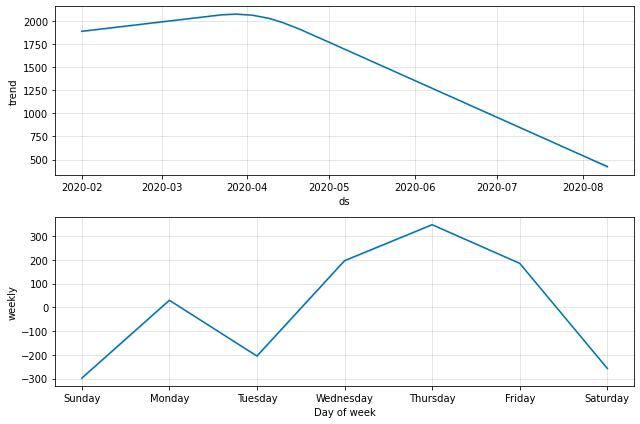

In [21]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

## Previsão da Chile

In [22]:
pais=['Chile']
df_ch = df1[df1['Country/Region'].isin(pais)]
df_ch= df_ch[['ds','y']]

m = Prophet()
m.fit(df_ch)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast.to_csv("prev_chile.csv")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbulxj_6/z72zpa44.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbulxj_6/1tkp2j6i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49692', 'data', 'file=/tmp/tmphbulxj_6/z72zpa44.json', 'init=/tmp/tmphbulxj_6/1tkp2j6i.json', 'output', 'file=/tmp/tmphbulxj_6/prophet_modelz6e5evnl/prophet_model-20221207002053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

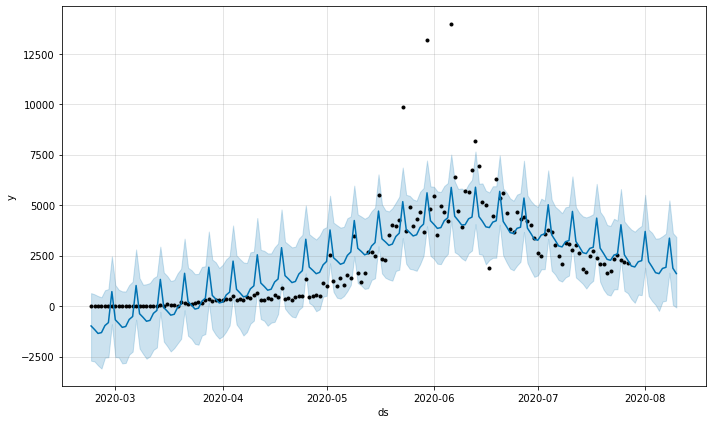

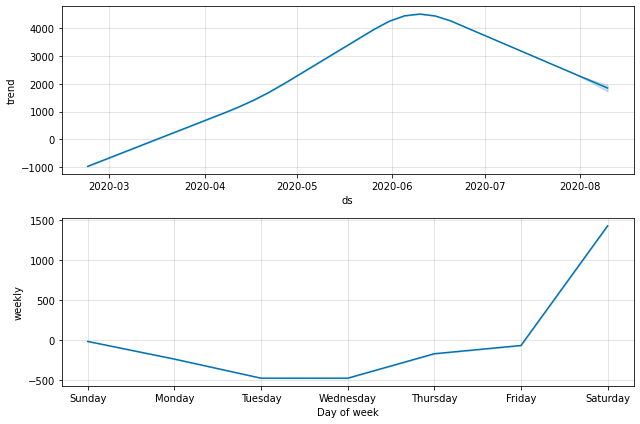

In [23]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

## Previsão do Ecuador

In [24]:
pais=['Ecuador']
df_ec = df1[df1['Country/Region'].isin(pais)]
df_ec= df_ec[['ds','y']]

m = Prophet()
m.fit(df_ec)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast.to_csv("prev_ecuador.csv")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbulxj_6/7aizt6m6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbulxj_6/6f6amki4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55591', 'data', 'file=/tmp/tmphbulxj_6/7aizt6m6.json', 'init=/tmp/tmphbulxj_6/6f6amki4.json', 'output', 'file=/tmp/tmphbulxj_6/prophet_modelvhlojq2u/prophet_model-20221207002055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

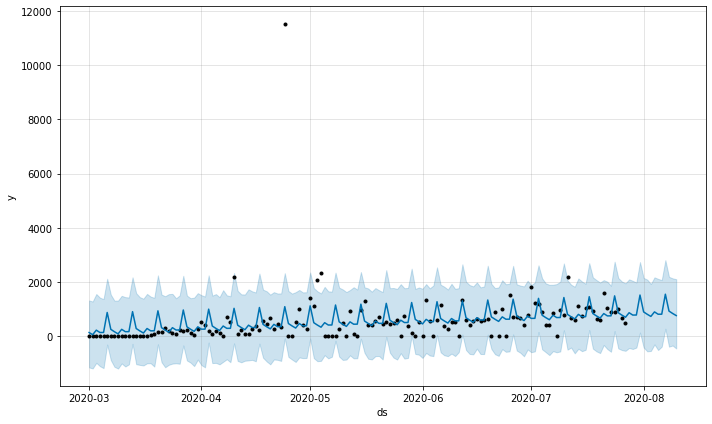

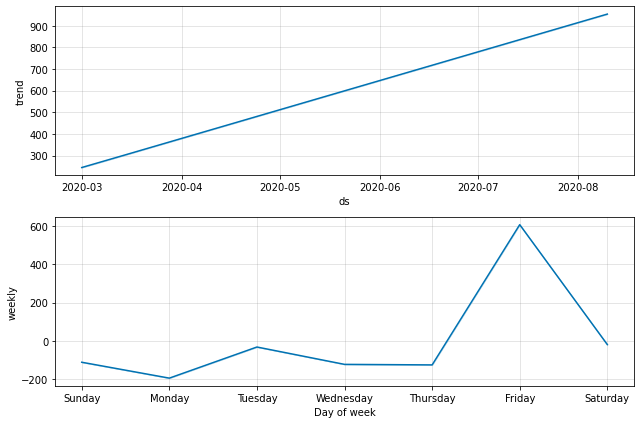

In [25]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show

## Previsão do Mexico

In [26]:
pais=['Mexico']
df_me = df1[df1['Country/Region'].isin(pais)]
df_me= df_me[['ds','y']]

m = Prophet()
m.fit(df_me)

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast.to_csv("prev_mexico.csv")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbulxj_6/rfadhju3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbulxj_6/aej6x13t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4633', 'data', 'file=/tmp/tmphbulxj_6/rfadhju3.json', 'init=/tmp/tmphbulxj_6/aej6x13t.json', 'output', 'file=/tmp/tmphbulxj_6/prophet_modelkf3s7lt9/prophet_model-20221207002056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

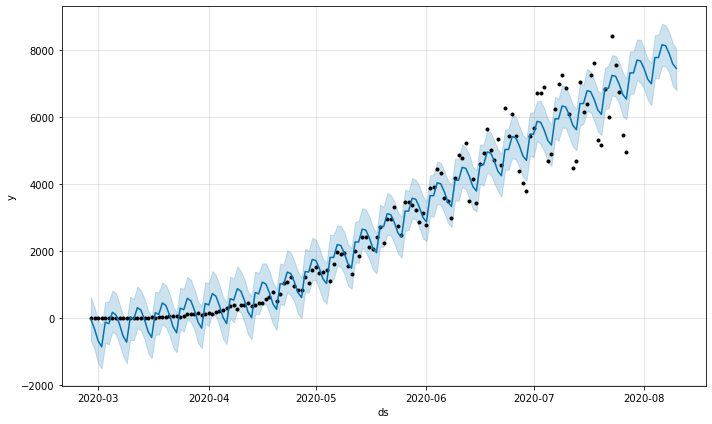

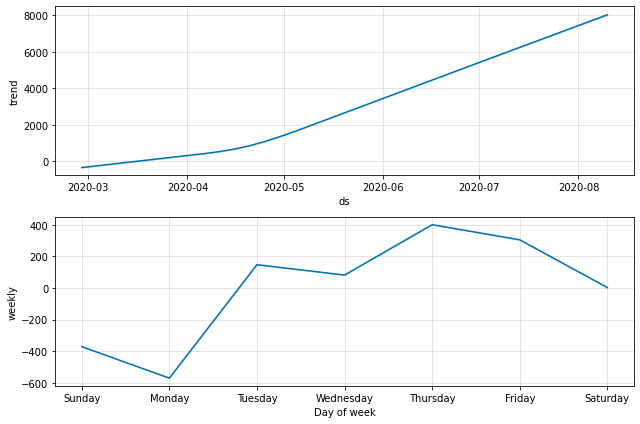

In [27]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig1.show
fig2.show